In [76]:
import numpy as np
import pandas as pd
import ipaddress
import netaddr
import matplotlib.pyplot as plt
from data_collection.parse_pcap import pcap_to_pandas, pcap_to_dict
from sklearn import linear_model

In [184]:
# Select Dataset

pcap = pcap_to_pandas('example_pcaps/google_home.pcap')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000


### Description
Below, we train a logistic classifier that predicts whether or not a packet is a DNS request or response from the packet length.

In [185]:
# Select the DNS rows and determine whether the device is sending or receiving a request.
dns_set = pcap.loc[pcap['is_dns'] == True];

y = dns_set.apply(lambda row: 1 if row['dns_resp'] == None else 0, axis=1).values;
x = dns_set['length'].values.reshape(-1, 1);

# These x-valeus are used for plotting the scatter points only.
# I'm not great with these APIs tbh...
x_t = dns_set.loc[dns_set['dns_resp'].isnull()]['length'].values.reshape(-1, 1);

x_f = dns_set.loc[dns_set['dns_resp'].notnull()]['length'].values.reshape(-1, 1);

In [186]:
dns_set

,datetime,dns_query,dns_resp,ip_dst,ip_dst_int,ip_src,ip_src_int,is_dns,length,mac_dst,mac_dst_int,mac_src,mac_src_int,port_dst,port_src,protocol,time,time_normed
16,2017-12-07 15:48:44.399009,b'clients1.google.com.',None,8.8.8.8,1.347441e+08,172.24.1.51,2.887254e+09,True,79,b8:27:eb:2d:24:15,202481588839445,a4:77:33:2f:e0:6e,180831866839150,53.0,43659.0,UDP,1.512680e+09,3.242926
17,2017-12-07 15:48:44.419893,b'pool.ntp.org.',None,8.8.8.8,1.347441e+08,172.24.1.51,2.887254e+09,True,72,b8:27:eb:2d:24:15,202481588839445,a4:77:33:2f:e0:6e,180831866839150,53.0,37402.0,UDP,1.512680e+09,3.263810
18,2017-12-07 15:48:44.423984,b'clients1.google.com.',b'clients1.google.com.',172.24.1.51,2.887254e+09,8.8.8.8,1.347441e+08,True,119,a4:77:33:2f:e0:6e,180831866839150,b8:27:eb:2d:24:15,202481588839445,43659.0,53.0,UDP,1.512680e+09,3.267901
23,2017-12-07 15:48:44.458457,b'pool.ntp.org.',b'pool.ntp.org.',172.24.1.51,2.887254e+09,8.8.8.8,1.347441e+08,True,136,a4:77:33:2f:e0:6e,180831866839150,b8:27:eb:2d:24:15,202481588839445,37402.0,53.0,UDP,1.512680e+09,3.302374
27,2017-12-07 15:48:44.480588,b'_googlecast._tcp.local.',None,224.0.0.251,3.758097e+09,172.24.1.51,2.887254e+09,True,82,01:00:5e:00:00:fb,1101088686331,a4:77:33:2f:e0:6e,180831866839150,5353.0,5353.0,UDP,1.512680e+09,3.324505
33,2017-12-07 15:48:44.520001,b'Google-Home-de204bc3dc23ad2c371dacfd3019540a...,b'Google-Home-de204bc3dc23ad2c371dacfd3019540a...,224.0.0.251,3.758097e+09,172.24.1.51,2.887254e+09,True,390,01:00:5e:00:00:fb,1101088686331,a4:77:33:2f:e0:6e,180831866839150,5353.0,5353.0,UDP,1.512680e+09,3.363918
34,2017-12-07 15:48:44.521809,b'de204bc3-dc23-ad2c-371d-acfd3019540a._google...,b'de204bc3-dc23-ad2c-371d-acfd3019540a._google...,224.0.0.251,3.758097e+09,172.24.1.51,2.887254e+09,True,250,01:00:5e:00:00:fb,1101088686331,a4:77:33:2f:e0:6e,180831866839150,5353.0,5353.0,UDP,1.512680e+09,3.365726
35,2017-12-07 15:48:44.523423,b'www.gstatic.com.',None,8.8.8.8,1.347441e+08,172.24.1.51,2.887254e+09,True,75,b8:27:eb:2d:24:15,202481588839445,a4:77:33:2f:e0:6e,180831866839150,53.0,60428.0,UDP,1.512680e+09,3.367340
36,2017-12-07 15:48:44.548278,b'www.gstatic.com.',b'www.gstatic.com.',172.24.1.51,2.887254e+09,8.8.8.8,1.347441e+08,True,91,a4:77:33:2f:e0:6e,180831866839150,b8:27:eb:2d:24:15,202481588839445,60428.0,53.0,UDP,1.512680e+09,3.392195
44,2017-12-07 15:48:44.785053,b'Google-Home-de204bc3dc23ad2c371dacfd3019540a...,b'Google-Home-de204bc3dc23ad2c371dacfd3019540a...,224.0.0.251,3.758097e+09,172.24.1.51,2.887254e+09,True,390,01:00:5e:00:00:fb,1101088686331,a4:77:33:2f:e0:6e,180831866839150,5353.0,5353.0,UDP,1.512680e+09,3.628970


In [198]:
# Train the classifier (C is the regularization param)
logreg = linear_model.LogisticRegression(C=100);
logreg.fit(x, y);

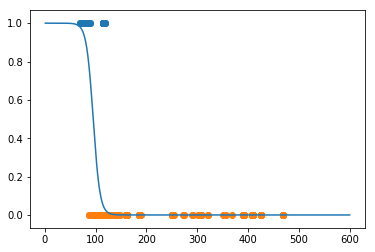

In [206]:
# Plot data
z = np.arange(1, 600, 0.5).reshape(-1, 1);
plt.plot(z, logreg.predict_proba(z)[:, 1]);
plt.scatter(x_t, np.ones(len(x_t)));
plt.scatter(x_f, np.zeros(len(x_f)));

In [221]:
# Load a test data file
pcap_test = pcap_to_pandas('example_pcaps/tplink_switch.pcap');
test_dns_set = pcap_test.loc[pcap_test['is_dns']];

In [238]:
# Check classifier accuracy
accuracy = sum(test_dns_set.apply(lambda row: (logreg.predict(row['length'])[0] == 1), axis=1) == test_dns_set['dns_resp'].isnull()) / len(test_dns_set);
print(f'Accuracy: {accuracy}')

Accuracy: 0.9166666666666666
